Author: Neven Caplar and the LINCC Frameworks team

Last updated: July 07, 2025

# RAIL photo-z estimates for Rubin Data Preview 1 (DP1)


In this tutorial, you will learn:

- How to access photo-z catalog derived from Rubin’s Data Preview 1 with LSDB 

# Loading through LSDB

Photo-z Science Unit generated photo-z estimates for every galaxy in DP1 using the available multi-band imaging on a best-effort basis. This effort is described at https://sitcomtn-154.lsst.io. 

In [1]:
import lsdb
import matplotlib.pyplot as plt

# replace with data.lsst.cloud / CANFAR path
PATH = "/rubin/lincc_lsb_data/object_photoz/"
dp1_pz_catalog = lsdb.open_catalog(PATH)
dp1_pz_catalog

,coord_dec,coord_ra,g_cModelMag,g_cModelMagErr,g_gaap1p0Mag,g_gaap1p0MagErr,g_gaap3p0Mag,g_gaap3p0MagErr,g_kronMag,g_kronMagErr,g_psfMag,g_psfMagErr,g_sersicMag,g_sersicMagErr,i_cModelMag,i_cModelMagErr,i_gaap1p0Mag,i_gaap1p0MagErr,i_gaap3p0Mag,i_gaap3p0MagErr,i_kronMag,i_kronMagErr,i_psfMag,i_psfMagErr,i_sersicMag,i_sersicMagErr,objectId,r_cModelMag,r_cModelMagErr,r_gaap1p0Mag,r_gaap1p0MagErr,r_gaap3p0Mag,r_gaap3p0MagErr,r_kronMag,r_kronMagErr,r_psfMag,r_psfMagErr,r_sersicMag,r_sersicMagErr,u_cModelMag,u_cModelMagErr,u_gaap1p0Mag,u_gaap1p0MagErr,u_gaap3p0Mag,u_gaap3p0MagErr,u_kronMag,u_kronMagErr,u_psfMag,u_psfMagErr,u_sersicMag,u_sersicMagErr,y_cModelMag,y_cModelMagErr,y_gaap1p0Mag,y_gaap1p0MagErr,y_gaap3p0Mag,y_gaap3p0MagErr,y_kronMag,y_kronMagErr,y_psfMag,y_psfMagErr,y_sersicMag,y_sersicMagErr,z_cModelMag,z_cModelMagErr,z_gaap1p0Mag,z_gaap1p0MagErr,z_gaap3p0Mag,z_gaap3p0MagErr,z_kronMag,z_kronMagErr,z_psfMag,z_psfMagErr,z_sersicMag,z_sersicMagErr,lephare_z_median,lephare_z_mean,lephare_z_mode,lephare_z_err95_low,lephare_z_err95_high,lephare_z_err68_low,lephare_z_err68_high,knn_z_median,knn_z_mode,knn_z_err95_low,knn_z_err95_high,knn_z_err68_low,knn_z_err68_high,tpz_z_median,tpz_z_mean,tpz_z_mode,tpz_z_err95_low,tpz_z_err95_high,tpz_z_err68_low,tpz_z_err68_high,cmnn_z_median,cmnn_z_mean,cmnn_z_mode,cmnn_z_err95_low,cmnn_z_err95_high,cmnn_z_err68_low,cmnn_z_err68_high,gpz_z_median,gpz_z_mean,gpz_z_mode,gpz_z_err95_low,gpz_z_err95_high,gpz_z_err68_low,gpz_z_err68_high,bpz_z_median,bpz_z_mean,bpz_z_mode,bpz_z_err95_low,bpz_z_err95_high,bpz_z_err68_low,bpz_z_err68_high,dnf_z_median,dnf_z_mean,dnf_z_mode,dnf_z_err95_low,dnf_z_err95_high,dnf_z_err68_low,dnf_z_err68_high,fzboost_z_median,fzboost_z_mean,fzboost_z_mode,fzboost_z_err95_low,fzboost_z_err95_high,fzboost_z_err68_low,fzboost_z_err68_high
npartitions=4,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 3, Pixel: 2",double[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],int64[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow]

In [2]:
# Extract method names based on column suffix to learn what photo-z methods are available
z_median_methods = sorted(
    col.replace("_z_median", "")
    for col in dp1_pz_catalog.all_columns
    if col.endswith("_z_median")
)

print(z_median_methods)

['bpz', 'cmnn', 'dnf', 'fzboost', 'gpz', 'knn', 'lephare', 'tpz']


## Plotting two estimators

Plotting, as an example, the results from Lephare and kNN.

In [3]:
dp1_pz_df = lsdb.open_catalog(PATH, columns = ["lephare_z_median", "knn_z_median"]).compute()

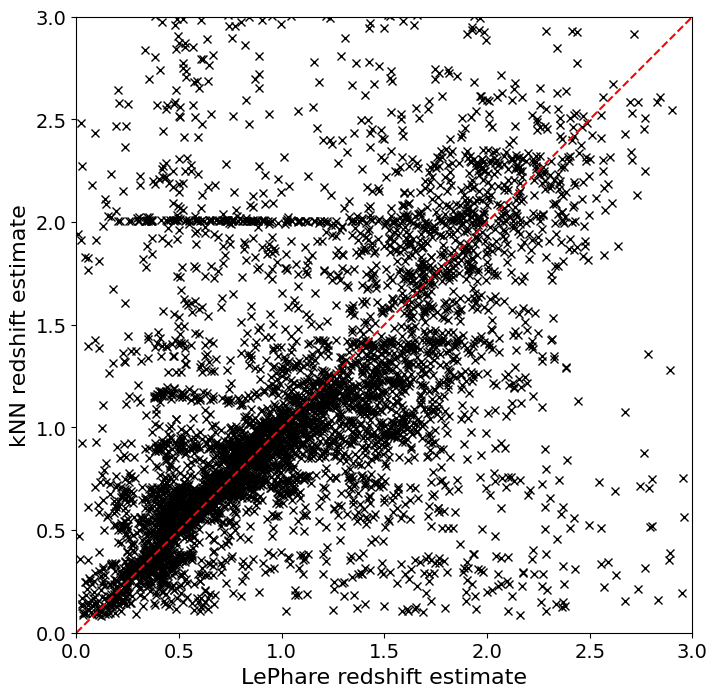

In [4]:
plt.figure(figsize=(8, 8))

# Plot sampled points
plt.plot(dp1_pz_df["lephare_z_median"].iloc[::100], dp1_pz_df["knn_z_median"].iloc[::100], "x", color="black")

# Set equal aspect ratio
plt.gca().set_aspect("equal", adjustable="box")

# Plot reference y=x line
plt.plot([0, 3], [0, 3], color="red", ls="--")

# Set axis limits
plt.xlim([0, 3])
plt.ylim([0, 3])

# Set axis labels with larger font size and descriptions
plt.xlabel("LePhare redshift estimate", fontsize=16)
plt.ylabel("kNN redshift estimate", fontsize=16)

# Make tick labels larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


# Problem 3

## Compare with spectrascopical DESI redshifts

Let's compare photometric redshifts with spectroscopical ones. Crossmatch with DESI spectroscopical redshift catalog (available at https://data.lsdb.io/#DESI/DESI_DR1_(z-catalog)) and compare any photoz method with spectroscopical redshifts.

In [5]:
desi_specz_catalog = lsdb.open_catalog("https://data.lsdb.io/hats/desi/desi_dr1_zcat")
xmatch = desi_specz_catalog.crossmatch(dp1_pz_catalog, radius_arcsec=1).compute()
xmatch

/astro/users/kmalanch/.virtualenvs/default/lib/python3.12/site-packages/lsdb/dask/crossmatch_catalog_data.py:147: RuntimeWarning: Right catalog does not have a margin cache. Results may be incomplete and/or inaccurate.
  warnings.warn(


,TARGETID_desi_dr1_zcat,SURVEY_desi_dr1_zcat,PROGRAM_desi_dr1_zcat,HEALPIX_desi_dr1_zcat,SPGRPVAL_desi_dr1_zcat,Z_desi_dr1_zcat,ZERR_desi_dr1_zcat,ZWARN_desi_dr1_zcat,CHI2_desi_dr1_zcat,COEFF_desi_dr1_zcat,NPIXELS_desi_dr1_zcat,SPECTYPE_desi_dr1_zcat,SUBTYPE_desi_dr1_zcat,NCOEFF_desi_dr1_zcat,DELTACHI2_desi_dr1_zcat,COADD_FIBERSTATUS_desi_dr1_zcat,TARGET_RA_desi_dr1_zcat,TARGET_DEC_desi_dr1_zcat,PMRA_desi_dr1_zcat,PMDEC_desi_dr1_zcat,REF_EPOCH_desi_dr1_zcat,FA_TARGET_desi_dr1_zcat,FA_TYPE_desi_dr1_zcat,OBJTYPE_desi_dr1_zcat,SUBPRIORITY_desi_dr1_zcat,OBSCONDITIONS_desi_dr1_zcat,RELEASE_desi_dr1_zcat,BRICKNAME_desi_dr1_zcat,BRICKID_desi_dr1_zcat,BRICK_OBJID_desi_dr1_zcat,MORPHTYPE_desi_dr1_zcat,EBV_desi_dr1_zcat,FLUX_G_desi_dr1_zcat,FLUX_R_desi_dr1_zcat,FLUX_Z_desi_dr1_zcat,FLUX_W1_desi_dr1_zcat,FLUX_W2_desi_dr1_zcat,FLUX_IVAR_G_desi_dr1_zcat,FLUX_IVAR_R_desi_dr1_zcat,FLUX_IVAR_Z_desi_dr1_zcat,FLUX_IVAR_W1_desi_dr1_zcat,FLUX_IVAR_W2_desi_dr1_zcat,FIBERFLUX_G_desi_dr1_zcat,FIBERFLUX_R_desi_dr1_zcat,FIBERFLUX_Z_desi_dr1_zcat,FIBERTOTFLUX_G_desi_dr1_zcat,FIBERTOTFLUX_R_desi_dr1_zcat,FIBERTOTFLUX_Z_desi_dr1_zcat,MASKBITS_desi_dr1_zcat,SERSIC_desi_dr1_zcat,SHAPE_R_desi_dr1_zcat,SHAPE_E1_desi_dr1_zcat,SHAPE_E2_desi_dr1_zcat,REF_ID_desi_dr1_zcat,REF_CAT_desi_dr1_zcat,GAIA_PHOT_G_MEAN_MAG_desi_dr1_zcat,GAIA_PHOT_BP_MEAN_MAG_desi_dr1_zcat,GAIA_PHOT_RP_MEAN_MAG_desi_dr1_zcat,PARALLAX_desi_dr1_zcat,PHOTSYS_desi_dr1_zcat,PRIORITY_INIT_desi_dr1_zcat,NUMOBS_INIT_desi_dr1_zcat,CMX_TARGET_desi_dr1_zcat,DESI_TARGET_desi_dr1_zcat,BGS_TARGET_desi_dr1_zcat,MWS_TARGET_desi_dr1_zcat,SCND_TARGET_desi_dr1_zcat,SV1_DESI_TARGET_desi_dr1_zcat,SV1_BGS_TARGET_desi_dr1_zcat,SV1_MWS_TARGET_desi_dr1_zcat,SV1_SCND_TARGET_desi_dr1_zcat,SV2_DESI_TARGET_desi_dr1_zcat,SV2_BGS_TARGET_desi_dr1_zcat,SV2_MWS_TARGET_desi_dr1_zcat,SV2_SCND_TARGET_desi_dr1_zcat,SV3_DESI_TARGET_desi_dr1_zcat,SV3_BGS_TARGET_desi_dr1_zcat,SV3_MWS_TARGET_desi_dr1_zcat,SV3_SCND_TARGET_desi_dr1_zcat,PLATE_RA_desi_dr1_zcat,PLATE_DEC_desi_dr1_zcat,COADD_NUMEXP_desi_dr1_zcat,COADD_EXPTIME_desi_dr1_zcat,COADD_NUMNIGHT_desi_dr1_zcat,COADD_NUMTILE_desi_dr1_zcat,MEAN_DELTA_X_desi_dr1_zcat,RMS_DELTA_X_desi_dr1_zcat,MEAN_DELTA_Y_desi_dr1_zcat,RMS_DELTA_Y_desi_dr1_zcat,MEAN_PSF_TO_FIBER_SPECFLUX_desi_dr1_zcat,MEAN_FIBER_RA_desi_dr1_zcat,STD_FIBER_RA_desi_dr1_zcat,MEAN_FIBER_DEC_desi_dr1_zcat,STD_FIBER_DEC_desi_dr1_zcat,MIN_MJD_desi_dr1_zcat,MAX_MJD_desi_dr1_zcat,MEAN_MJD_desi_dr1_zcat,TSNR2_GPBDARK_B_desi_dr1_zcat,TSNR2_ELG_B_desi_dr1_zcat,TSNR2_GPBBRIGHT_B_desi_dr1_zcat,TSNR2_LYA_B_desi_dr1_zcat,TSNR2_BGS_B_desi_dr1_zcat,TSNR2_GPBBACKUP_B_desi_dr1_zcat,TSNR2_QSO_B_desi_dr1_zcat,TSNR2_LRG_B_desi_dr1_zcat,TSNR2_GPBDARK_R_desi_dr1_zcat,TSNR2_ELG_R_desi_dr1_zcat,TSNR2_GPBBRIGHT_R_desi_dr1_zcat,TSNR2_LYA_R_desi_dr1_zcat,TSNR2_BGS_R_desi_dr1_zcat,TSNR2_GPBBACKUP_R_desi_dr1_zcat,TSNR2_QSO_R_desi_dr1_zcat,TSNR2_LRG_R_desi_dr1_zcat,TSNR2_GPBDARK_Z_desi_dr1_zcat,TSNR2_ELG_Z_desi_dr1_zcat,TSNR2_GPBBRIGHT_Z_desi_dr1_zcat,TSNR2_LYA_Z_desi_dr1_zcat,TSNR2_BGS_Z_desi_dr1_zcat,TSNR2_GPBBACKUP_Z_desi_dr1_zcat,TSNR2_QSO_Z_desi_dr1_zcat,TSNR2_LRG_Z_desi_dr1_zcat,TSNR2_GPBDARK_desi_dr1_zcat,TSNR2_ELG_desi_dr1_zcat,TSNR2_GPBBRIGHT_desi_dr1_zcat,TSNR2_LYA_desi_dr1_zcat,TSNR2_BGS_desi_dr1_zcat,TSNR2_GPBBACKUP_desi_dr1_zcat,TSNR2_QSO_desi_dr1_zcat,TSNR2_LRG_desi_dr1_zcat,MAIN_NSPEC_desi_dr1_zcat,MAIN_PRIMARY_desi_dr1_zcat,SV_NSPEC_desi_dr1_zcat,SV_PRIMARY_desi_dr1_zcat,ZCAT_NSPEC_desi_dr1_zcat,ZCAT_PRIMARY_desi_dr1_zcat,DESINAME_desi_dr1_zcat,coord_dec_object_photoz,coord_ra_object_photoz,g_cModelMag_object_photoz,g_cModelMagErr_object_photoz,g_gaap1p0Mag_object_photoz,g_gaap1p0MagErr_object_photoz,g_gaap3p0Mag_object_photoz,g_gaap3p0MagErr_object_photoz,g_kronMag_object_photoz,g_kronMagErr_object_photoz,g_psfMag_object_photoz,g_psfMagErr_object_photoz,g_sersicMag_object_photoz,g_sersicMagErr_object_photoz,i_cModelMag_object_photoz,i_cModelMagErr_object_photoz,i_gaap1p0Mag_object_photoz,i_gaap1p0MagErr_object_photoz,i_gaap3p0Ma

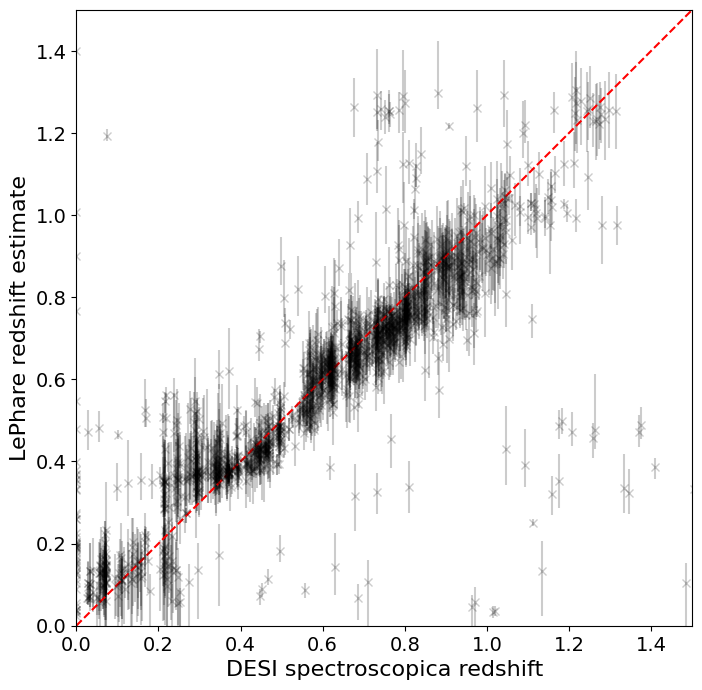

In [6]:
plt.figure(figsize=(8, 8))

# Filter out 
low_error = xmatch.query("lephare_z_err68_high_object_photoz - lephare_z_err68_low_object_photoz < 0.2")

# Plot with errorbars
plt.errorbar(
    x=low_error["Z_desi_dr1_zcat"],
    y=low_error["lephare_z_median_object_photoz"],
    yerr=[
        low_error["lephare_z_err68_high_object_photoz"] - low_error["lephare_z_median_object_photoz"],
        low_error["lephare_z_median_object_photoz"] - low_error["lephare_z_err68_low_object_photoz"],
    ],
    fmt="x",
    color="black",
    alpha=0.2,
)

# Set equal aspect ratio
plt.gca().set_aspect("equal", adjustable="box")

# Plot reference y=x line
plt.plot([0, 1.5], [0, 1.5], color="red", ls="--")

# Set axis limits
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])

# Set axis labels with larger font size and descriptions
plt.xlabel("DESI spectroscopica redshift", fontsize=16)
plt.ylabel("LePhare redshift estimate", fontsize=16)

# Make tick labels larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()